<a href="https://colab.research.google.com/github/rajeshmore1/Linear-Regression-Basics-Assignment/blob/main/Rajesh_More_Assignment_Copy_of_M3W1D2_Assignment_Linear_Regression_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

The original .csv file does not contain column names and whole data was in one column only. Hence I made seperate .csv file and manually put column names there.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_dir_path = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 3/Week 1/Day 2/'
housing_df=pd.read_csv(working_dir_path + 'Boston Housing.csv')

In [ ]:
housing_df.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
housing_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
housing_df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273     21.0  396.90   7.88  11.9

[506 rows x 14 colu

In [ ]:
housing_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


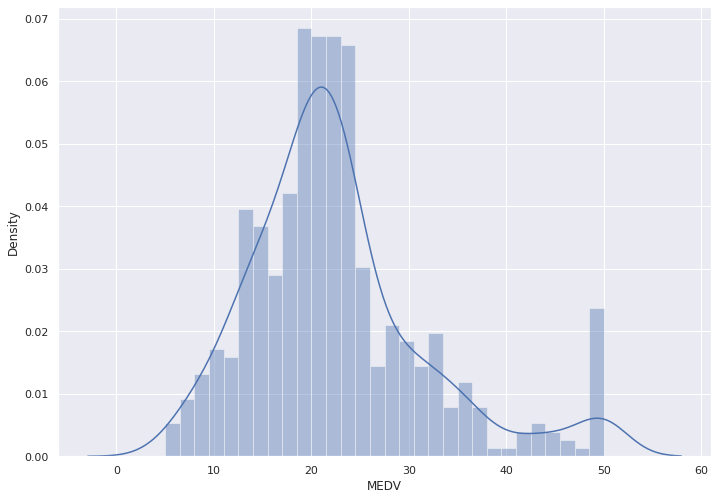

In [ ]:
#MEDV is dependent variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(housing_df['MEDV'], bins=30)
plt.show()

# Check out linearity of dependent variable(MEDV) with each feature variable

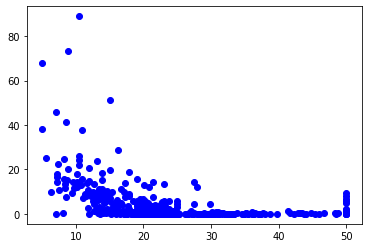

In [ ]:
CRIM=housing_df['CRIM']
MEDV=housing_df['MEDV']
plt.scatter(MEDV,CRIM, c ="blue") 
  
# To show the plot 
plt.show() 

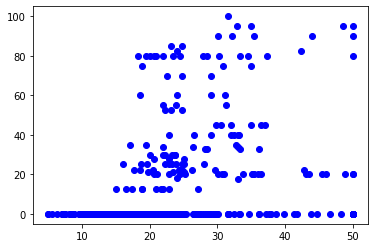

In [ ]:
ZN=housing_df['ZN']
MEDV=housing_df['MEDV']
plt.scatter(MEDV,ZN, c ="blue") 
  
# To show the plot 
plt.show() 

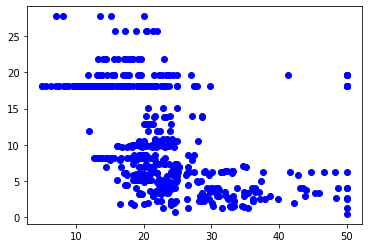

In [ ]:
INDUS=housing_df['INDUS']
MEDV=housing_df['MEDV']
plt.scatter(MEDV,INDUS, c ="blue") 
  
# To show the plot 
plt.show() 

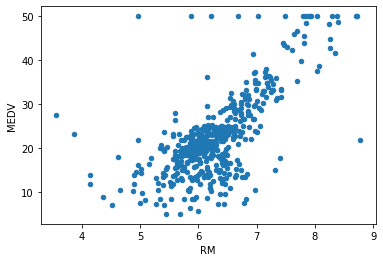

In [ ]:
#Alternate method to plot scatterplot
housing_df.plot.scatter('RM', 'MEDV')

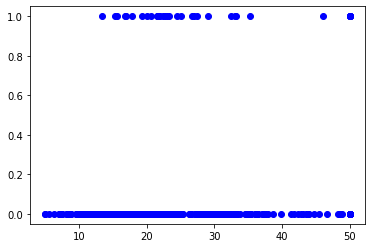

In [ ]:
CHAS=housing_df['CHAS']
MEDV=housing_df['MEDV']
plt.scatter(MEDV,CHAS, c ="blue") 
  
# To show the plot 
plt.show() 

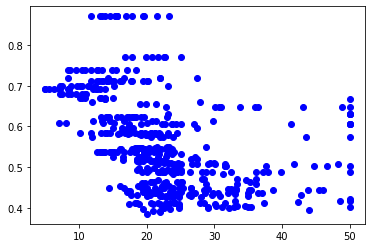

In [ ]:
NOX=housing_df['NOX']
MEDV=housing_df['MEDV']
plt.scatter(MEDV,NOX, c ="blue") 
  
# To show the plot 
plt.show() 

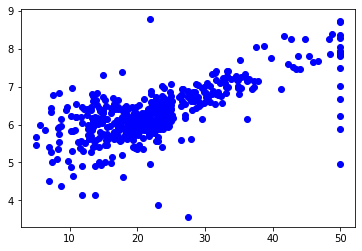

In [ ]:
RM=housing_df['RM']
MEDV=housing_df['MEDV']
plt.scatter(MEDV,RM, c ="blue") 
  
# To show the plot 
plt.show() 

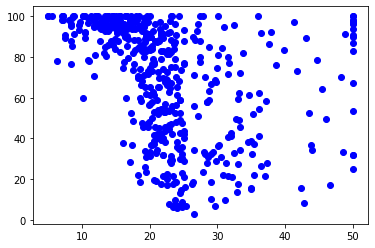

In [ ]:
AGE=housing_df['AGE']
MEDV=housing_df['MEDV']
plt.scatter(MEDV,AGE, c ="blue") 
  
# To show the plot 
plt.show() 

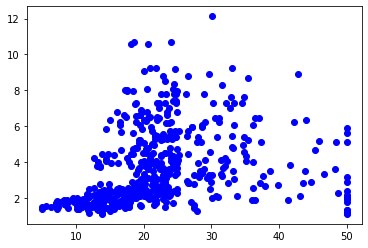

In [ ]:
DIS=housing_df['DIS']
MEDV=housing_df['MEDV']
plt.scatter(MEDV,DIS, c ="blue") 
  
# To show the plot 
plt.show() 

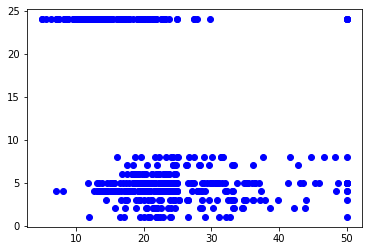

In [ ]:
RAD=housing_df['RAD']
MEDV=housing_df['MEDV']
plt.scatter(MEDV,RAD, c ="blue") 
  
# To show the plot 
plt.show() 

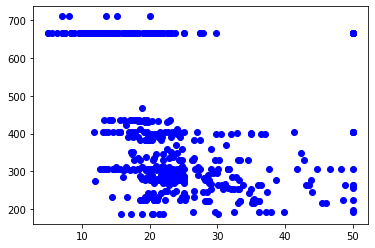

In [ ]:
TAX=housing_df['TAX']
MEDV=housing_df['MEDV']
plt.scatter(MEDV,TAX, c ="blue") 
  
# To show the plot 
plt.show() 

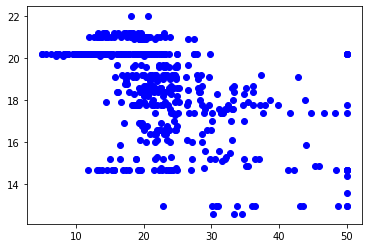

In [ ]:
PTRATIO=housing_df['PTRATIO']
MEDV=housing_df['MEDV']
plt.scatter(MEDV,PTRATIO, c ="blue") 
  
# To show the plot 
plt.show() 

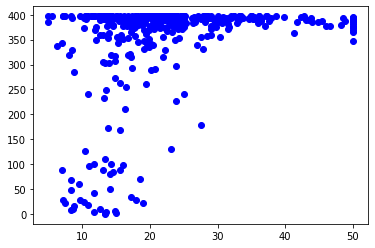

In [ ]:
B=housing_df['B']
MEDV=housing_df['MEDV']
plt.scatter(MEDV,B, c ="blue") 
  
# To show the plot 
plt.show() 

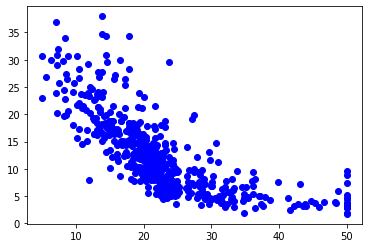

In [ ]:
LSTAT=housing_df['LSTAT']
MEDV=housing_df['MEDV']
plt.scatter(MEDV,LSTAT, c ="blue") 
  
# To show the plot 
plt.show() 

# We are considering all feature/independent variables

In [ ]:
X = housing_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = housing_df['MEDV']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

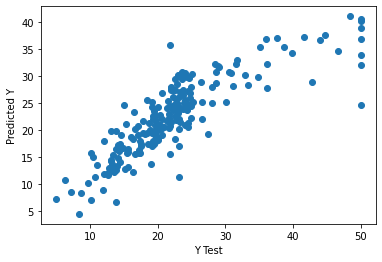

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.3110494303999407
MSE: 23.151304318864856
RMSE: 4.811580230949584


Considering the RMSE: we can conclude that this model average error is RMSE at medv, which means RMSE *1000 in money

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


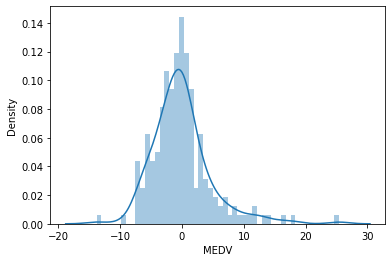

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
CRIM,-0.090634
ZN,0.036418
INDUS,0.002024
CHAS,2.783371
NOX,-18.806340
RM,3.348851
AGE,0.006954
DIS,-1.384839
RAD,0.259337
TAX,-0.009966


How to interpret those coefficients: they are in function of MEDV, so

for one unit that nox increase, the house value decrease 'nox'*1000 (Negative correlation) money unit.
for one unit that rm increase, the house value increase 'rm'*1000 (Positive correlation) money unit.

*1000 because the medv is in 1000 and this apply to the other variables/coefficients.

#  ALTERNATIVE APPROACH BY CONSIDERING ONLY REQUIRED COLUMNS

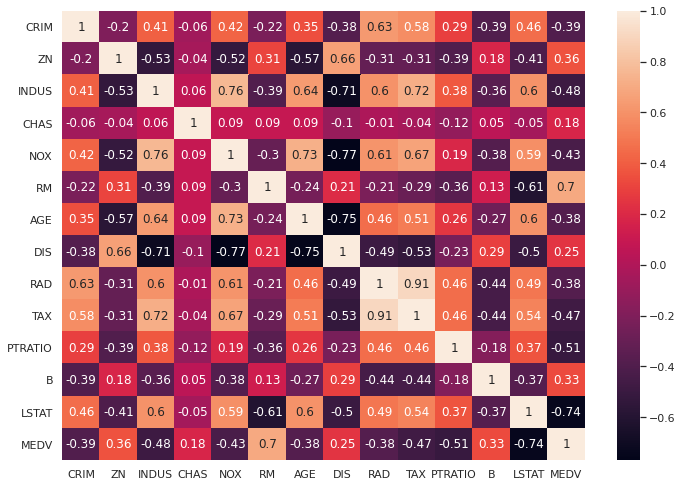

In [ ]:
correlation_matrix = housing_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Observations:

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.


Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

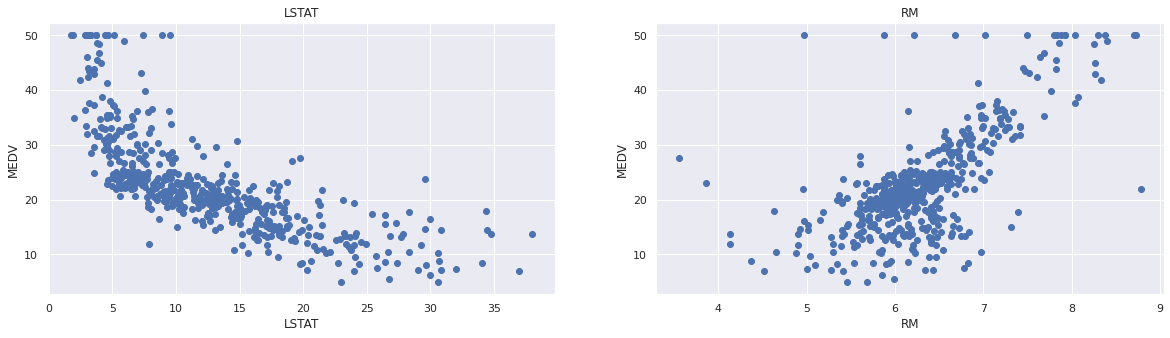

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = housing_df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = housing_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

**Observations**:

The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

**Preparing the data for training the model**

We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.

In [ ]:
X = pd.DataFrame(np.c_[housing_df['LSTAT'], housing_df['RM']], columns = ['LSTAT','RM'])
Y = housing_df['MEDV']

**Splitting the data into training and testing sets**

Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


**Training and testing the model**
We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Model evaluation
We will evaluate our model using RMSE and R2-score.


In [ ]:
from sklearn.metrics import r2_score
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


# BY DOING MANUAL CALCULATIONS

The number of feature variables are 13 in our data frame. For simplicity I am taking only one variable LSTAT. Im performing manual operations to calculate the slope of the line.Here The dependent variable is MEDV.

In [ ]:
Required_df =pd.DataFrame(housing_df[['LSTAT','MEDV']])
Required_df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [ ]:
Required_df['X_square']=Required_df['LSTAT'].pow(2)
Required_df

,LSTAT,MEDV,X_square
0,4.98,24.0,24.8004
1,9.14,21.6,83.5396
2,4.03,34.7,16.2409
3,2.94,33.4,8.6436
4,5.33,36.2,28.4089
...,...,...,...
501,9.67,22.4,93.5089
502,9.08,20.6,82.4464
503,5.64,23.9,31.8096
504,6.48,22.0,41.9904


In [ ]:
Required_df['XY']=Required_df['LSTAT']*Required_df['MEDV']
Required_df

,LSTAT,MEDV,X_square,XY
0,4.98,24.0,24.8004,119.520
1,9.14,21.6,83.5396,197.424
2,4.03,34.7,16.2409,139.841
3,2.94,33.4,8.6436,98.196
4,5.33,36.2,28.4089,192.946
...,...,...,...,...
501,9.67,22.4,93.5089,216.608
502,9.08,20.6,82.4464,187.048
503,5.64,23.9,31.8096,134.796
504,6.48,22.0,41.9904,142.560


Taking sum of each column

In [ ]:
Required_df.sum(axis = 0, skipna = True)

LSTAT         6402.4500
MEDV         11401.6000
X_square    106762.9583
XY          119799.1590
dtype: float64

Summation of X = 6402.4500

Summation of Y = 11401.6

Summation of X square = 106762.9583

Summation of XY = 119799.1590

In [ ]:
#Number of Data values N equals to:
Required_df.shape

(506, 4)

Number of Data values N equals to: n=506

**Calculate Slope M**

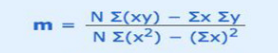

In [ ]:
Numerator= 506*119799.15 - 6402.45*11401.6
Denominator = 506*106762.95 - (6402.45**2)
m= Numerator/Denominator
m

-0.9500500094423366

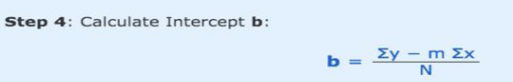

In [ ]:
msigmax = -0.95*6402.45
print(msigmax)
b= (11401.6-(-0.95*6402.45))/(506)
b

-6082.327499999999


34.553216403162054

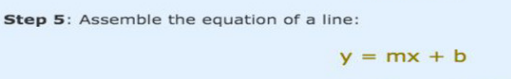

# Equation Of The Line Is: **Y= -0.95 X + 34.55**